In [1]:
# imports
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from loadUniPenData import loadUnipenData
from plotting import plotUniPenData
from normalize import normalize_example

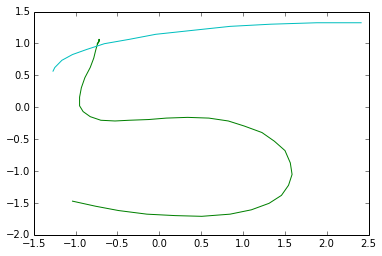

In [2]:
# Load Unipen Data and labels
data, labels = loadUnipenData('../data/pendigits-orig.tra')

# Normalize data within each digit drawing
# And plot an example
# Tdata is the data without PenUp and PenDown
data, tdata = normalize_example(data)
plotUniPenData(data[8])

In [3]:
from math import atan2, pi, ceil

def encode_direction(raw_data):
    enc_data = []
    lengths = []
    for example in raw_data:
        sq = []
        for point in example:
            x = point[0]
            y = point[1]
            if x == -1 and y == 1:
                sq.append([8])
                xp = float('inf')
            elif x == -1 and y == -1:
                sq.append([9])
                xp = float('inf')
            else:
                if xp != float('inf'):
                    dx = xp - x
                    dy = yp - y 
                    direction = (int(ceil(atan2(dy, dx) / (2 * pi / 8))) + 8) % 8
                    sq.append([direction])
                xp = x
                yp = y
        enc_data.extend(sq)
        lengths.append(len(sq))
    return enc_data, lengths

def encode_direction_ex(example):
    sq = []
    for point in example:
        x = point[0]
        y = point[1]
        if x == -1 and y == 1:
            sq.append([8])
            xp = float('inf')
        elif x == -1 and y == -1:
            sq.append([9])
            xp = float('inf')
        else:
            if xp != float('inf'):
                dx = xp - x
                dy = yp - y 
                direction = (int(ceil(atan2(dy, dx) / (2 * pi / 8))) + 8) % 8
                sq.append([direction])
            xp = x
            yp = y
    return sq
    

In [8]:
from hmmlearn.hmm import MultinomialHMM

def train(data, labels):
    models = {}
    labels = np.array(labels)
    for i in range(10):
        print "Class", i
        ind = np.where(labels == i)
        digit_data = np.array(data)[ind]
        enc_data, lengths = encode_direction(digit_data)
        
        model = MultinomialHMM(n_components=10,
                                   n_iter=20,
                                   tol=100,
                                   verbose=True,
                                   params='ste',
                                   init_params='e')
        
        init = 1. / 10
        model.startprob_ = np.full(10, init)
        model.transmat_ = np.full((10, 10), init)
        model.fit(enc_data, lengths)
        models[i] = model
    return models

models = train(data, labels)

Class 0


         1      -61905.0881             +nan
         2      -57955.9348       +3949.1533
         3      -57245.8832        +710.0516
         4      -56040.9910       +1204.8922
         5      -53487.1168       +2553.8743
         6      -48338.3434       +5148.7734
         7      -42512.4724       +5825.8709
         8      -36925.6813       +5586.7912
         9      -31488.0230       +5437.6582
        10      -27722.5620       +3765.4610
        11      -25937.2677       +1785.2943
        12      -25000.2828        +936.9849
        13      -24528.2724        +472.0104
        14      -24266.3842        +261.8882
        15      -24091.5053        +174.8789
        16      -23962.4704        +129.0349
        17      -23874.5896         +87.8808


Class 1


         1      -66048.3330             +nan
         2      -52864.8642      +13183.4688
         3      -52313.4832        +551.3810
         4      -51221.9387       +1091.5446
         5      -48727.2856       +2494.6530
         6      -43649.9068       +5077.3789
         7      -38467.6186       +5182.2882
         8      -36369.0503       +2098.5682
         9      -35297.5711       +1071.4792
        10      -34375.0232        +922.5479
        11      -33241.8194       +1133.2038
        12      -32010.2526       +1231.5668
        13      -31215.8423        +794.4102
        14      -30652.6481        +563.1942
        15      -30289.9631        +362.6850
        16      -30035.2638        +254.6993
        17      -29859.4344        +175.8294
        18      -29700.4454        +158.9890
        19      -29507.2426        +193.2028
        20      -29255.0099        +252.2326


Class 2


         1      -73701.6453             +nan
         2      -62802.6841      +10898.9612
         3      -61702.6777       +1100.0063
         4      -59018.2446       +2684.4331
         5      -53109.6402       +5908.6044
         6      -45887.3876       +7222.2526
         7      -41036.9154       +4850.4722
         8      -37946.6335       +3090.2819
         9      -35466.5295       +2480.1040
        10      -33115.7706       +2350.7589
        11      -31577.5768       +1538.1938
        12      -30754.7678        +822.8090
        13      -30358.6877        +396.0801
        14      -30122.6917        +235.9959
        15      -29891.9633        +230.7285
        16      -29617.9089        +274.0544
        17      -29307.3855        +310.5233
        18      -28982.6488        +324.7368
        19      -28656.1405        +326.5083
        20      -28351.5880        +304.5525


Class 3


         1      -78868.0246             +nan
         2      -63140.3648      +15727.6598
         3      -61618.3919       +1521.9729
         4      -59135.6680       +2482.7239
         5      -54575.2376       +4560.4304
         6      -46854.4731       +7720.7646
         7      -39141.7208       +7712.7523
         8      -34098.4521       +5043.2687
         9      -31469.7233       +2628.7288
        10      -30153.4024       +1316.3209
        11      -29429.6393        +723.7631
        12      -28976.1697        +453.4697
        13      -28683.3677        +292.8020
        14      -28491.5976        +191.7701
        15      -28361.1554        +130.4421
        16      -28262.0042         +99.1513


Class 4


         1      -78011.3541             +nan
         2      -64828.5148      +13182.8393
         3      -63835.8052        +992.7096
         4      -61389.6450       +2446.1602
         5      -56993.6897       +4395.9553
         6      -52406.6297       +4587.0600
         7      -48352.7880       +4053.8417
         8      -44497.9101       +3854.8779
         9      -42040.8102       +2457.0998
        10      -40446.6216       +1594.1887
        11      -39387.8447       +1058.7769
        12      -38940.7920        +447.0527
        13      -38724.0351        +216.7568
        14      -38587.3902        +136.6450
        15      -38475.4611        +111.9291
        16      -38361.4022        +114.0589
        17      -38228.8705        +132.5317
        18      -38068.0411        +160.8294
        19      -37875.3150        +192.7261
        20      -37644.8918        +230.4233


Class 5


         1      -81482.3132             +nan
         2      -70939.1639      +10543.1493
         3      -69554.2526       +1384.9113
         4      -66219.1481       +3335.1045
         5      -61416.7026       +4802.4455
         6      -56966.3172       +4450.3854
         7      -53032.9018       +3933.4154
         8      -49017.4547       +4015.4472
         9      -44440.0979       +4577.3567
        10      -40460.8951       +3979.2028
        11      -38362.3320       +2098.5631
        12      -36977.5291       +1384.8030
        13      -35889.9272       +1087.6018
        14      -35463.4171        +426.5101
        15      -35334.6255        +128.7916
        16      -35281.9289         +52.6966


Class 6


         1      -57207.7347             +nan
         2      -50160.8414       +7046.8933
         3      -49703.2602        +457.5812
         4      -48786.5043        +916.7558
         5      -46755.1093       +2031.3950
         6      -41898.6794       +4856.4300
         7      -33813.9488       +8084.7305
         8      -28018.6578       +5795.2911
         9      -25779.4249       +2239.2328
        10      -24784.8038        +994.6211
        11      -24273.3139        +511.4899
        12      -23928.4429        +344.8710
        13      -23657.9423        +270.5006
        14      -23385.0967        +272.8456
        15      -23031.1334        +353.9633
        16      -22605.9104        +425.2230
        17      -22194.7768        +411.1336
        18      -21808.3559        +386.4209
        19      -21428.2429        +380.1130
        20      -21112.6585        +315.5844


Class 7


         1      -74892.1852             +nan
         2      -64389.0328      +10503.1524
         3      -62782.1064       +1606.9263
         4      -58883.1139       +3898.9925
         5      -53370.6506       +5512.4634
         6      -47762.3593       +5608.2913
         7      -43131.9401       +4630.4192
         8      -39008.7531       +4123.1870
         9      -36159.0004       +2849.7527
        10      -34410.6539       +1748.3465
        11      -33328.4893       +1082.1646
        12      -32657.3820        +671.1072
        13      -32266.6581        +390.7240
        14      -32037.0080        +229.6501
        15      -31891.5495        +145.4585
        16      -31782.7443        +108.8051
        17      -31695.0279         +87.7164


Class 8


         1      -78158.6009             +nan
         2      -70537.2514       +7621.3495
         3      -69745.8210        +791.4304
         4      -68107.8113       +1638.0098
         5      -65084.4667       +3023.3445
         6      -59802.1468       +5282.3199
         7      -54002.3376       +5799.8092
         8      -48403.2656       +5599.0720
         9      -42919.1791       +5484.0865
        10      -39817.2337       +3101.9454
        11      -38251.3374       +1565.8962
        12      -37327.5350        +923.8024
        13      -36717.8208        +609.7142
        14      -36152.9219        +564.8990
        15      -35551.9471        +600.9747
        16      -34989.8756        +562.0716
        17      -34498.0780        +491.7976
        18      -34087.4664        +410.6116
        19      -33784.1775        +303.2889
        20      -33587.1248        +197.0527


Class 9


         1      -81576.2847             +nan
         2      -71919.0729       +9657.2118
         3      -71112.5274        +806.5454
         4      -69858.4848       +1254.0426
         5      -67257.5646       +2600.9202
         6      -61783.0957       +5474.4689
         7      -54532.4246       +7250.6711
         8      -49224.6288       +5307.7958
         9      -46842.3663       +2382.2625
        10      -45540.8131       +1301.5532
        11      -44307.3358       +1233.4773
        12      -42854.3091       +1453.0268
        13      -40454.8146       +2399.4944
        14      -38457.1575       +1997.6571
        15      -37548.6920        +908.4655
        16      -36788.7074        +759.9846
        17      -35873.4412        +915.2662
        18      -35071.0502        +802.3910
        19      -34621.7192        +449.3310
        20      -34409.1358        +212.5834


In [9]:
test, test_labels = loadUnipenData('pendigits-orig.tes')
test_data, ptest_data = normalize_example(test)


plabels = []
for j in range(len(test_data)):
    llks = np.zeros(10)
    enc_data = np.atleast_2d(encode_direction_ex(test_data[j]))
    for i in range(10):
        llks[i] = models[i].score(enc_data)
    plabels.append(np.argmax(llks))


print float(np.sum(np.array(plabels) == np.array(test_labels))) / len(plabels)

0.756718124643
